<a href="https://colab.research.google.com/github/PooniaDigvijay/jovian-careers-website/blob/main/Linear_Regression_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The following topics are covered in this session:**
1. Problem Statement for machine learning.
2. Download and explore a dataset.
3. Linear Regression with one variable using Scikit-learn.
4. LR using multiple variables.
5. Use the categorical features for Machine Learning.
6. Regression Cofficients and features.
7. Other models and techniques for regression and Scikit learn.
8. Apply linear regression to other datasets.

**Question:** ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers,** using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

Steps for the problem


**Downloading the data!**

In [50]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [51]:
from urllib.request import urlretrieve

In [52]:
urlretrieve(medical_charges_url, 'medical_csv')

('medical_csv', <http.client.HTTPMessage at 0x7d22d154c9d0>)

In [53]:
!pip install pandas --quiet

In [54]:
import pandas as pd

In [55]:
medical_df = pd.read_csv('medical_csv')

In [56]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [57]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**EDA**

Charges - other Columns
We will wuse the malplotlib, seaborn, and plotly for visualization

In [59]:
!pip install plotly matplotlib seaborn --quiet

In [60]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [61]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']= (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Age**

In [62]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [63]:
fig =  px.histogram(medical_df,
                    x='age',
                    marginal = 'box',
                    nbins=47,
                    title = 'Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

**Body Mass Index**

In [64]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal = 'box',
                   color_discrete_sequence=['red'],
                   title = 'Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [65]:
fig = px.histogram(medical_df,
                   x= 'charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title= 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [66]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence=['blue', 'pink'],
                   title = 'Annual Medical Charges as per genders')
fig.update_layout(bargap = 0.1)
fig.show()

In [67]:
fig = px.histogram(medical_df,
                   x= 'charges',
                   marginal= 'box',
                   color = 'region',
                   color_discrete_sequence=['green', 'blue', 'red', 'white'],
                   title = 'Annual Charges and region')
fig.update_layout(bargap = 0.1)
fig.show()

**Smoker**

<Axes: xlabel='smoker'>

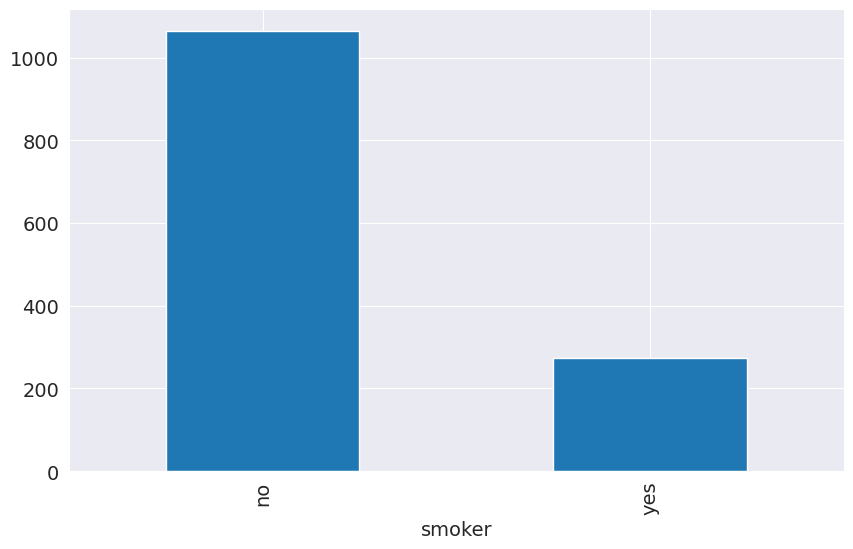

In [68]:
medical_df.smoker.value_counts().plot(kind= 'bar')

In [69]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [70]:
fig =  px.histogram(medical_df,
                    x='smoker',
                    color = 'sex',
                    title = 'Smoker')
fig.show()

In [71]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [78]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 title = 'BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [79]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [80]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [82]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [88]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = medical_df.select_dtypes(include=numerics)
newdf.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


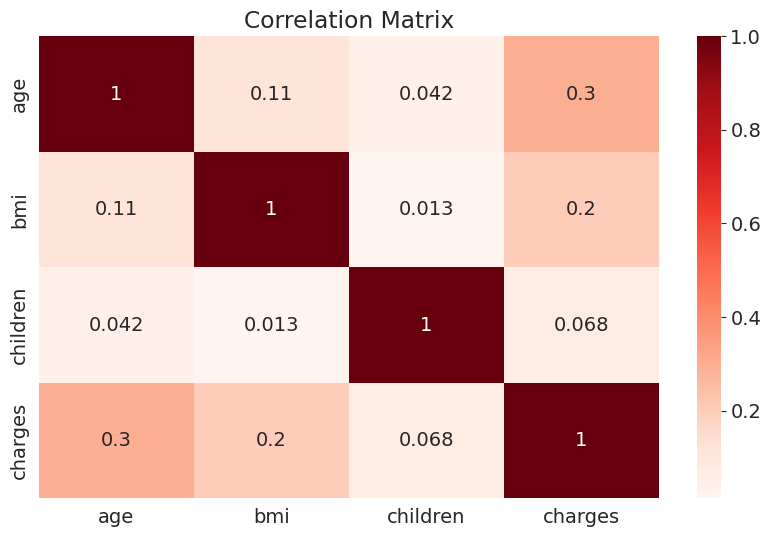

In [91]:
sns.heatmap(newdf.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [92]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

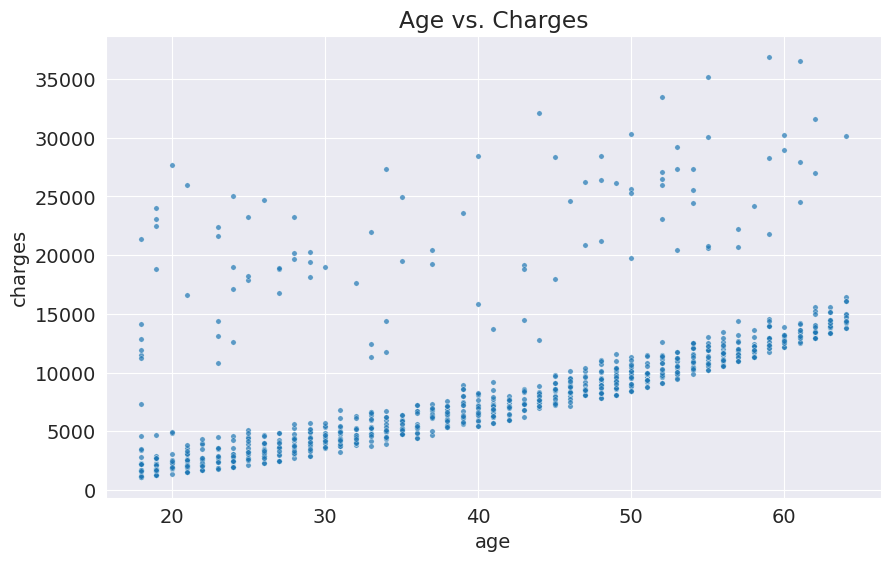

In [93]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [94]:
def estimate_charges(age, w, b):
    return w * age + b

In [95]:
w = 50
b = 100

In [96]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

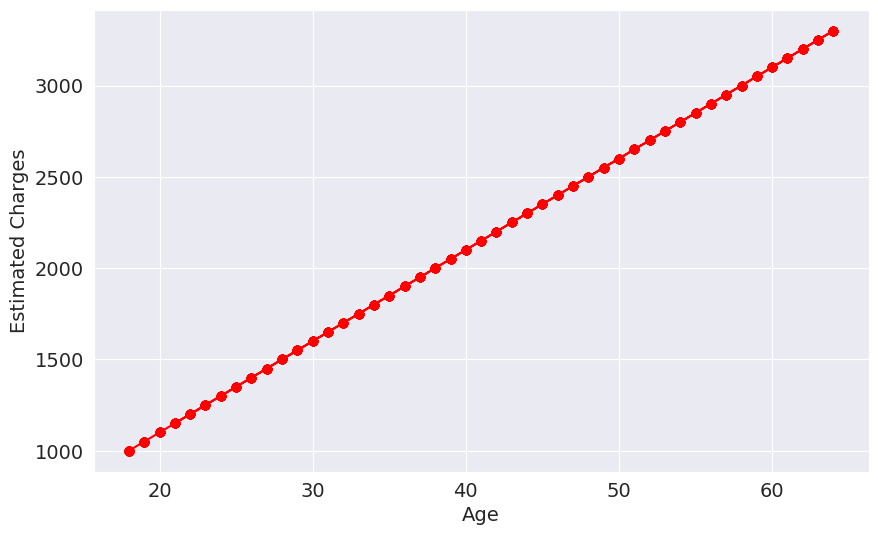

In [97]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');